In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED_FOR_MODEL_TRAINING.csv')
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [3]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [4]:
### STEP 1: INDEPENDENT AND DEPENDENT FEATURES
X = df.drop('FWI', axis=1)
y = df['FWI']

In [5]:
### STEP 2: TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [6]:
### STEP 3: Feature Selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.501279,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.745431,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.583986,0.093371
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.745431,0.583986,1.000000,0.158763


<Axes: >

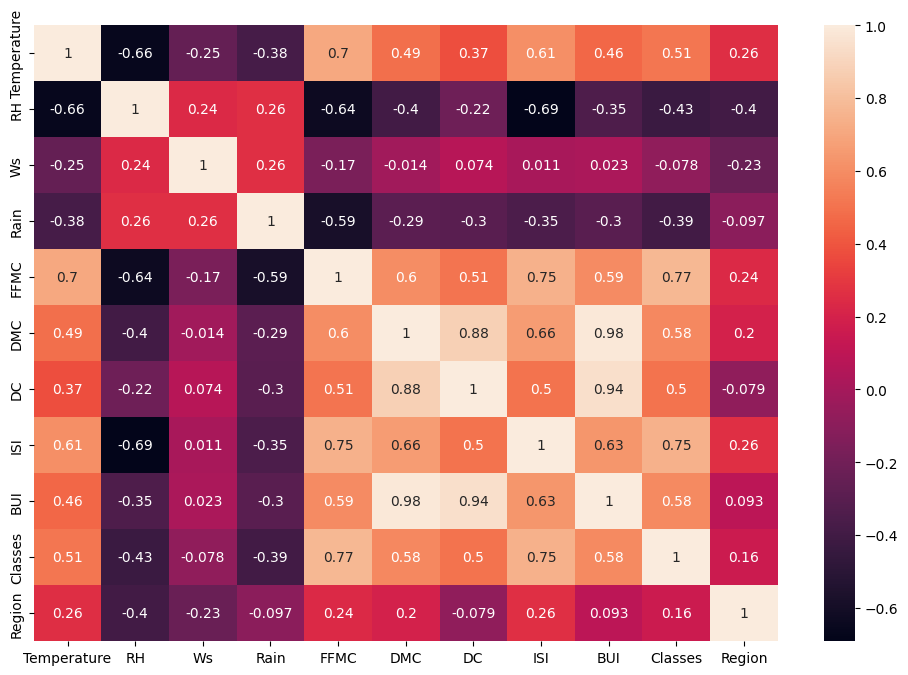

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True)

In [8]:
## Check for multicollinearity
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
se = correlation(X_train, 0.85)
se

{'BUI', 'DC'}

In [10]:
## Drop the features with high correlation
# WHY? Because they are providing the same information to the model and it can lead to overfitting. We can drop one of the features from the pair of highly correlated features.
X_train.drop(se, axis=1, inplace=True)

In [11]:
X_test.drop(se, axis=1, inplace=True)

In [12]:
X_train.shape, X_test.shape

((183, 9), (61, 9))

In [13]:
## STEP 4: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

### Model Training

In [14]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_Scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = lr.predict(X_test_Scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.5516452785962693
R2 Score: 0.9903254415482379


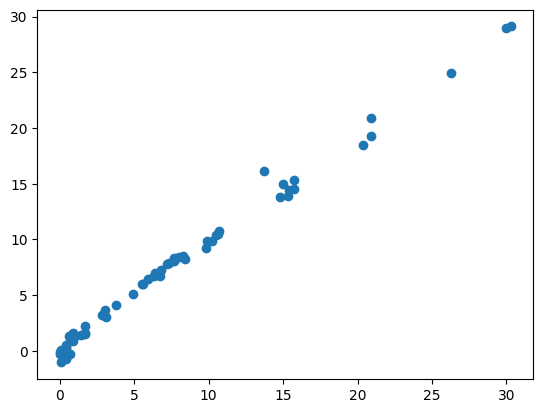

In [16]:
plt.scatter(y_test, y_pred) ## If the points are close to the line y=x, then the model is performing well. If the points are scattered, then the model is not performing well.

In [17]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_Scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = lasso.predict(X_test_Scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 1.1862508609509752
R2 Score: 0.9527186921986258


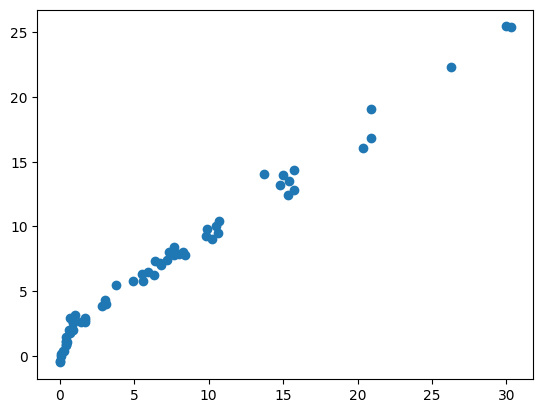

In [19]:
plt.scatter(y_test, y_pred)

### LASSSO CV

In [20]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [21]:
lassocv.alphas_

array([6.70445658, 6.25259865, 5.83119443, 5.43819144, 5.07167554,
       4.72986158, 4.41108474, 4.11379239, 3.83653655, 3.57796683,
       3.33682384, 3.11193308, 2.90219921, 2.70660069, 2.52418487,
       2.35406325, 2.19540727, 2.04744417, 1.90945328, 1.78076252,
       1.66074509, 1.54881643, 1.44443138, 1.34708154, 1.25629276,
       1.17162283, 1.09265937, 1.01901779, 0.9503394 , 0.8862897 ,
       0.82655674, 0.77084959, 0.7188969 , 0.67044566, 0.62525986,
       0.58311944, 0.54381914, 0.50716755, 0.47298616, 0.44110847,
       0.41137924, 0.38365366, 0.35779668, 0.33368238, 0.31119331,
       0.29021992, 0.27066007, 0.25241849, 0.23540633, 0.21954073,
       0.20474442, 0.19094533, 0.17807625, 0.16607451, 0.15488164,
       0.14444314, 0.13470815, 0.12562928, 0.11716228, 0.10926594,
       0.10190178, 0.09503394, 0.08862897, 0.08265567, 0.07708496,
       0.07188969, 0.06704457, 0.06252599, 0.05831194, 0.05438191,
       0.05071676, 0.04729862, 0.04411085, 0.04113792, 0.03836

In [22]:
lassocv.mse_path_

array([[58.91577975, 44.30507327, 54.66745457, 72.80979441, 36.97248445],
       [54.08220408, 39.12388795, 49.94600549, 69.53150545, 32.4786371 ],
       [48.6362257 , 34.5159559 , 43.94622556, 63.41332128, 28.69216696],
       [43.00655732, 30.48823376, 38.28047424, 58.00762221, 24.90656785],
       [38.00403596, 26.96649955, 33.35790218, 53.22729559, 21.43636669],
       [33.62422836, 23.88611375, 29.08128393, 48.99619187, 18.4914339 ],
       [29.78781779, 21.19074095, 25.36616095, 45.24772242, 15.99826876],
       [26.42585112, 18.83133423, 22.13893688, 40.44635228, 13.89316887],
       [23.47823349, 16.76515197, 19.33610022, 35.76154005, 12.12183164],
       [20.89258276, 14.9549708 , 16.90195488, 31.66385988, 10.63652162],
       [18.62303629, 13.36829407, 14.78823449, 28.07862112,  9.39625565],
       [16.63019294, 11.97685411, 12.9529759 , 24.94051245,  8.36564012],
       [14.87910455, 10.75599145, 11.35969704, 22.19192458,  7.51412578],
       [13.33948285,  9.68420663,  9.9

Mean absolute error 0.590225550670557
R2 Score 0.989599580707254


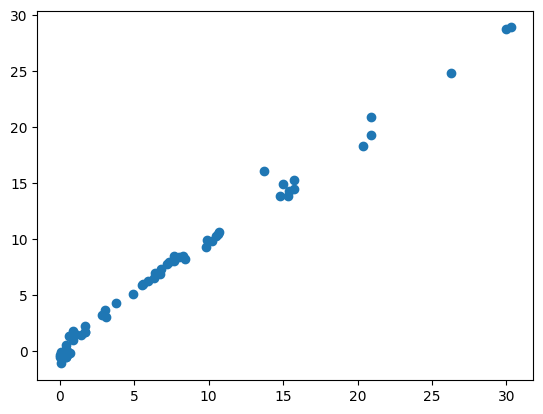

In [23]:
y_pred=lassocv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [24]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_Scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = ridge.predict(X_test_Scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.5779554428412195
R2 Score: 0.9896510143175394


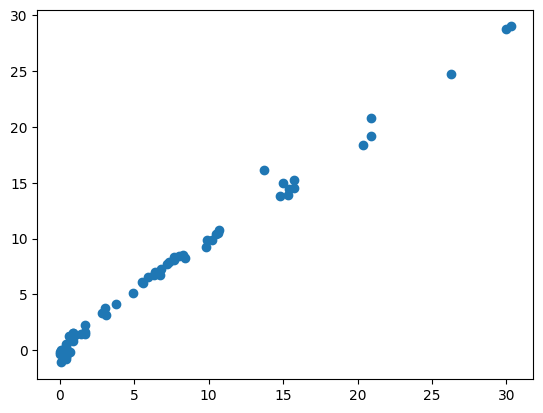

In [26]:
plt.scatter(y_test, y_pred)

### Ridge CV

Mean absolute error 0.5779554428412195
R2 Score 0.9896510143175394


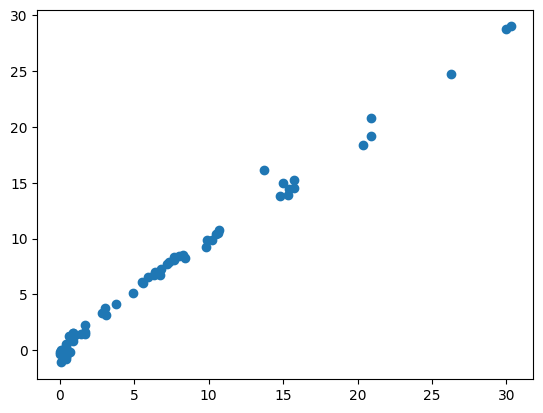

In [27]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_Scaled,y_train)
y_pred=ridgecv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [28]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

In [29]:
## ElasticNet Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_Scaled, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = elasticnet.predict(X_test_Scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 1.9100570629061815
R2 Score: 0.8776588851433474


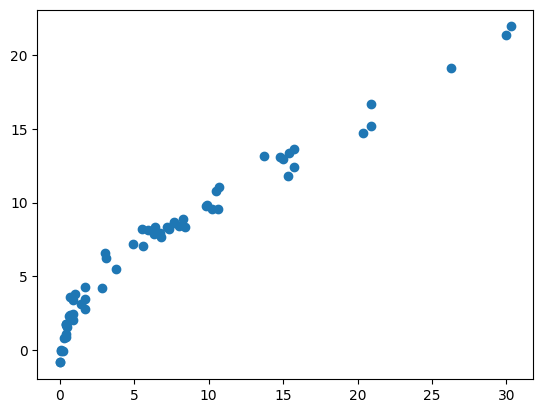

In [31]:
plt.scatter(y_test, y_pred)

### ElasticNet CV

Mean absolute error 0.6148342313483076
R2 Score 0.9888306667580836


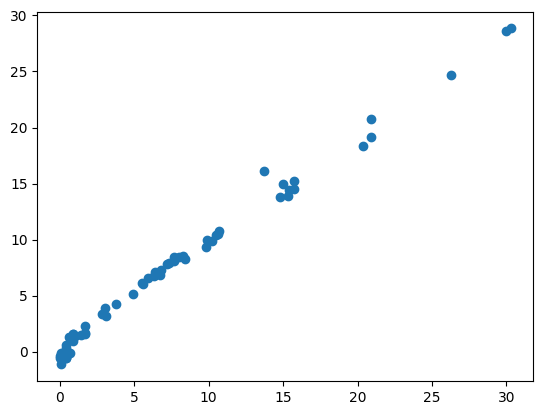

In [32]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_Scaled,y_train)
y_pred=elasticcv.predict(X_test_Scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [33]:
elasticcv.alphas_

array([13.40891317, 12.5051973 , 11.66238885, 10.87638288, 10.14335107,
        9.45972316,  8.82216948,  8.22758478,  7.67307311,  7.15593366,
        6.67364768,  6.22386616,  5.80439841,  5.41320139,  5.04836973,
        4.70812651,  4.39081454,  4.09488833,  3.81890657,  3.56152504,
        3.32149018,  3.09763286,  2.88886277,  2.69416309,  2.51258551,
        2.34324566,  2.18531874,  2.03803557,  1.9006788 ,  1.77257941,
        1.65311349,  1.54169917,  1.43779381,  1.34089132,  1.25051973,
        1.16623889,  1.08763829,  1.01433511,  0.94597232,  0.88221695,
        0.82275848,  0.76730731,  0.71559337,  0.66736477,  0.62238662,
        0.58043984,  0.54132014,  0.50483697,  0.47081265,  0.43908145,
        0.40948883,  0.38189066,  0.3561525 ,  0.33214902,  0.30976329,
        0.28888628,  0.26941631,  0.25125855,  0.23432457,  0.21853187,
        0.20380356,  0.19006788,  0.17725794,  0.16531135,  0.15416992,
        0.14377938,  0.13408913,  0.12505197,  0.11662389,  0.10

In [34]:
### Pickling
import pickle
pickle.dump(ridge, open('ridge.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))